<a href="https://colab.research.google.com/github/SHANUKRISHNAN/AFTERNOON-SESSION/blob/main/DIAMOND_AND_PENGUINS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1375]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [1376]:
df1=sns.load_dataset('diamonds')
df1.head()
df1.describe()
df1.nunique()

,0
carat,273
cut,5
color,7
clarity,8
depth,184
table,127
price,11602
x,554
y,552
z,375


In [1377]:
df1.info()
df1.isnull().sum()
df1.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


,0
carat,273
cut,5
color,7
clarity,8
depth,184
table,127
price,11602
x,554
y,552
z,375


In [1378]:
df1['cut'].value_counts()

,count
cut,
Ideal,21551
Premium,13791
Very Good,12082
Good,4906
Fair,1610


In [1379]:
from sklearn.model_selection import train_test_split
x=df1.drop(['price'],axis=1)
y=df1['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((43152, 9), (10788, 9), (43152,), (10788,))

In [1380]:
x_train,x_test,y_train,y_test

(       carat        cut color clarity  depth  table     x     y     z
 26546   2.01       Good     F     SI2   58.1   64.0  8.23  8.19  4.77
 9159    1.01  Very Good     E     SI2   60.0   60.0  6.57  6.49  3.92
 14131   1.10    Premium     H     VS2   62.5   58.0  6.59  6.54  4.10
 15757   1.50       Good     E     SI2   61.5   65.0  7.21  7.17  4.42
 24632   1.52  Very Good     G     VS1   62.1   57.0  7.27  7.32  4.53
 ...      ...        ...   ...     ...    ...    ...   ...   ...   ...
 11284   1.05  Very Good     I     VS2   62.4   59.0  6.48  6.51  4.05
 44732   0.47      Ideal     D     VS1   61.0   55.0  5.03  5.01  3.06
 38158   0.33  Very Good     F      IF   60.3   58.0  4.49  4.46  2.70
 860     0.90    Premium     J     SI1   62.8   59.0  6.13  6.03  3.82
 15795   1.14    Premium     F     SI1   60.4   58.0  6.82  6.79  4.11
 
 [43152 rows x 9 columns],
        carat        cut color clarity  depth  table     x     y     z
 1388    0.24      Ideal     G    VVS1   62.1   

In [1381]:
from sklearn.preprocessing import OrdinalEncoder

In [1382]:
ordinal_cols=[['Fair','Good','Very Good','Premium','Ideal']]
oe=OrdinalEncoder(categories=ordinal_cols)
x_train['cut']=oe.fit_transform(x_train[['cut']])
x_test['cut']=oe.transform(x_test[['cut']])
x_test.head()

,carat,cut,color,clarity,depth,table,x,y,z
1388,0.24,4.0,G,VVS1,62.1,56.0,3.97,4.00,2.47
50052,0.58,2.0,F,VVS2,60.0,57.0,5.44,5.42,3.26
41645,0.40,4.0,E,VVS2,62.1,55.0,4.76,4.74,2.95
42377,0.43,3.0,E,VVS2,60.8,57.0,4.92,4.89,2.98
17244,1.55,4.0,E,SI2,62.3,55.0,7.44,7.37,4.61


In [1383]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10788 entries, 1388 to 4998
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    10788 non-null  float64 
 1   cut      10788 non-null  float64 
 2   color    10788 non-null  category
 3   clarity  10788 non-null  category
 4   depth    10788 non-null  float64 
 5   table    10788 non-null  float64 
 6   x        10788 non-null  float64 
 7   y        10788 non-null  float64 
 8   z        10788 non-null  float64 
dtypes: category(2), float64(7)
memory usage: 696.0 KB


In [1384]:
# x_train=pd.get_dummies(x_train,columns=['color'],prefix='COLOR',drop_first=True)
# x_train=pd.get_dummies(x_train,columns=['clarity'],prefix='CLARITY',drop_first=True)
# x_test=pd.get_dummies(x_test,columns=['color'],prefix='COLOR',drop_first=True)
# x_test=pd.get_dummies(x_test,columns=['clarity'],prefix='CLARITY',drop_first=True)

# bool_col=x_train.select_dtypes(include='bool').columns
# bool_col=x_test.select_dtypes(include='bool').columns

# x_train[bool_col]=x_train[bool_col].astype(int)
# x_test[bool_col]=x_test[bool_col].astype(int)

In [1385]:
from sklearn.preprocessing import OneHotEncoder


In [1386]:
ohe=OneHotEncoder()
categorical_cols = ['color', 'clarity']
x_train_encoded=ohe.fit_transform(x_train[categorical_cols])
x_train_encoded_df=pd.DataFrame(x_train_encoded.toarray(),columns=ohe.get_feature_names_out(categorical_cols),index=x_train.index)

x_test_encoded = ohe.transform(x_test[categorical_cols])
x_test_encoded_df = pd.DataFrame(x_test_encoded.toarray(), columns=ohe.get_feature_names_out(categorical_cols), index=x_test.index)

# Drop original categorical columns and concatenate encoded ones
x_train = pd.concat([x_train.drop(columns=categorical_cols), x_train_encoded_df], axis=1)
x_test = pd.concat([x_test.drop(columns=categorical_cols), x_test_encoded_df], axis=1)

print("x_train after OneHotEncoding:")
display(x_train.head())
print("x_test after OneHotEncoding:")
display(x_test.head())

x_train after OneHotEncoding:


,carat,cut,depth,table,x,y,z,color_D,color_E,color_F,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
26546,2.01,1.0,58.1,64.0,8.23,8.19,4.77,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9159,1.01,2.0,60.0,60.0,6.57,6.49,3.92,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14131,1.10,3.0,62.5,58.0,6.59,6.54,4.10,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15757,1.50,1.0,61.5,65.0,7.21,7.17,4.42,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
24632,1.52,2.0,62.1,57.0,7.27,7.32,4.53,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


x_test after OneHotEncoding:


,carat,cut,depth,table,x,y,z,color_D,color_E,color_F,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1388,0.24,4.0,62.1,56.0,3.97,4.00,2.47,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
50052,0.58,2.0,60.0,57.0,5.44,5.42,3.26,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41645,0.40,4.0,62.1,55.0,4.76,4.74,2.95,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
42377,0.43,3.0,60.8,57.0,4.92,4.89,2.98,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17244,1.55,4.0,62.3,55.0,7.44,7.37,4.61,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


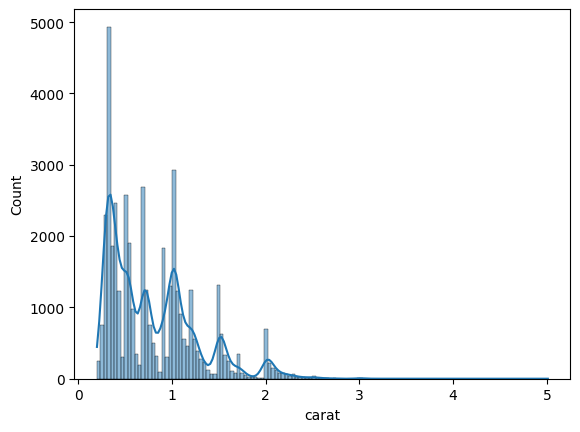

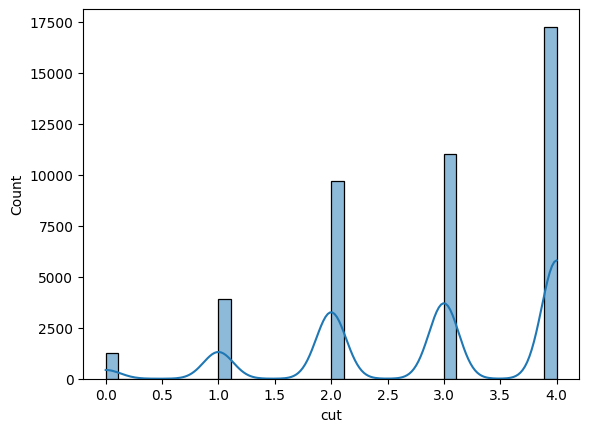

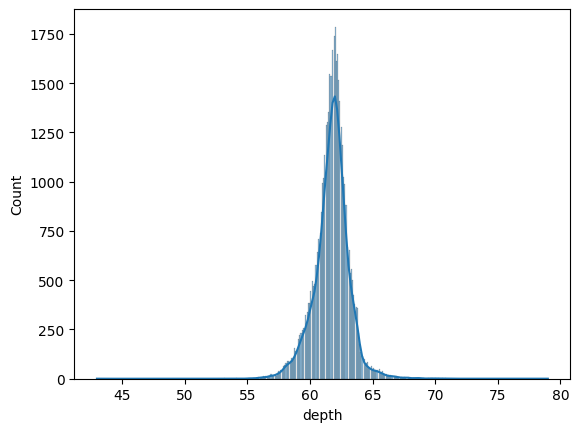

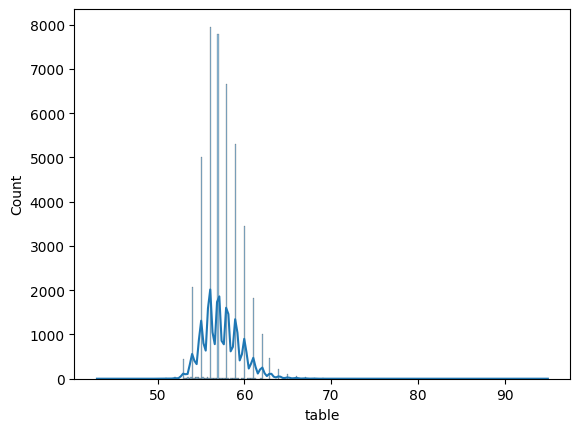

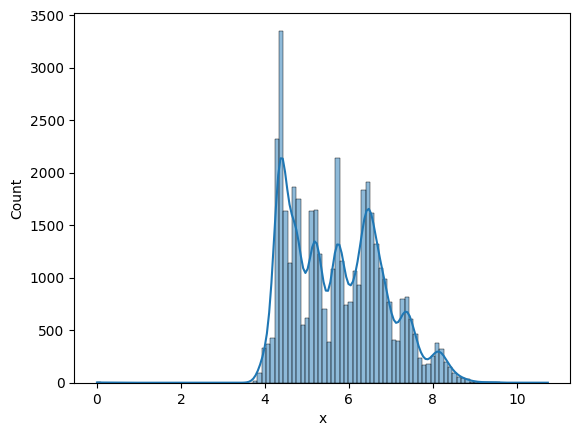

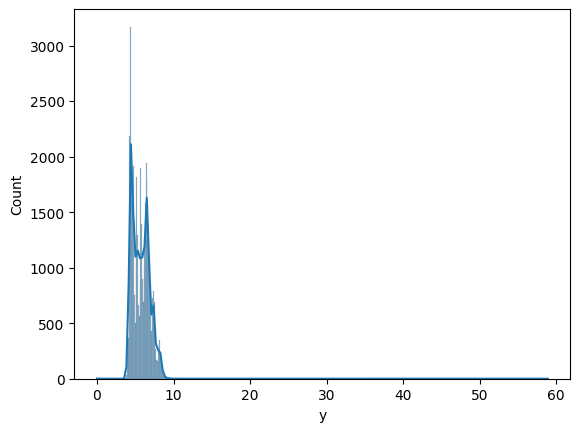

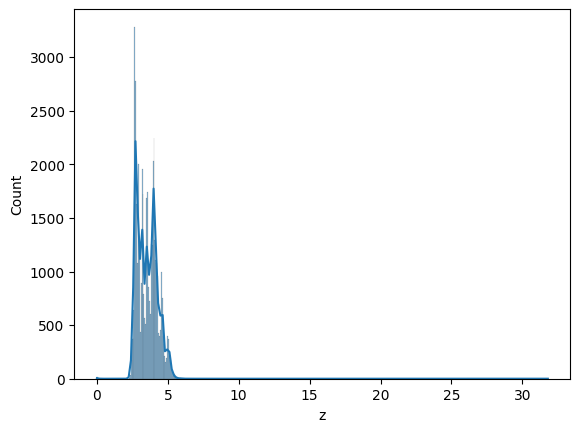

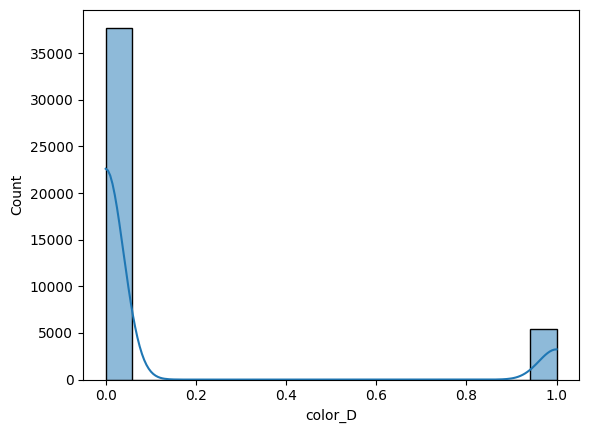

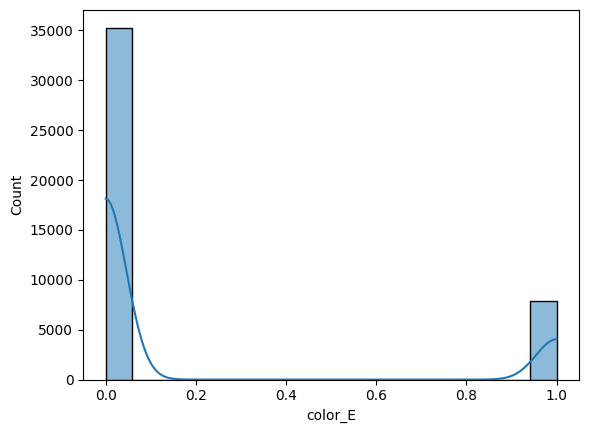

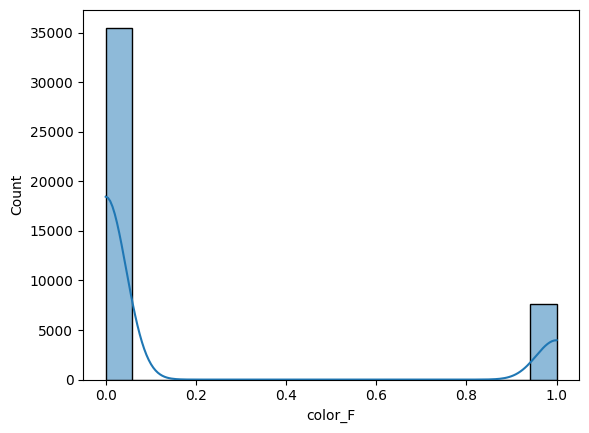

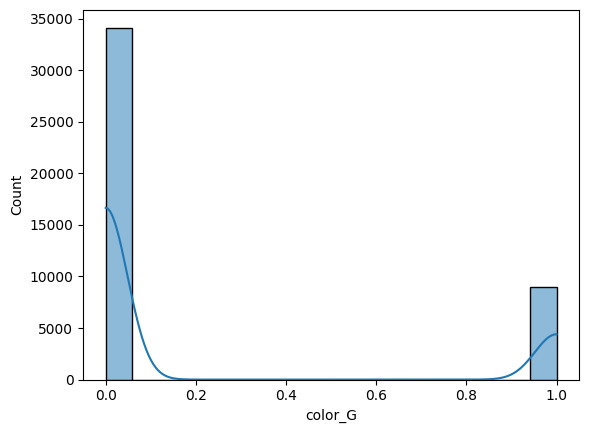

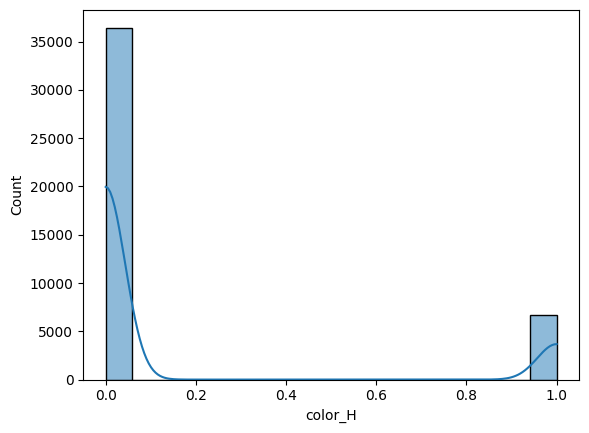

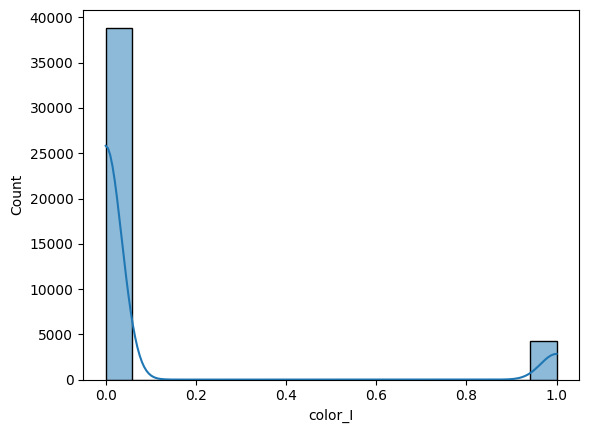

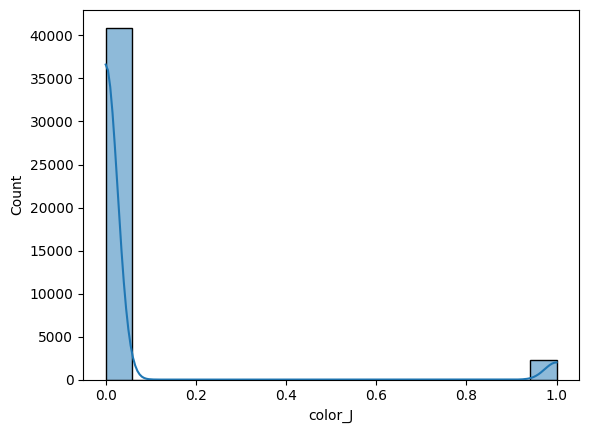

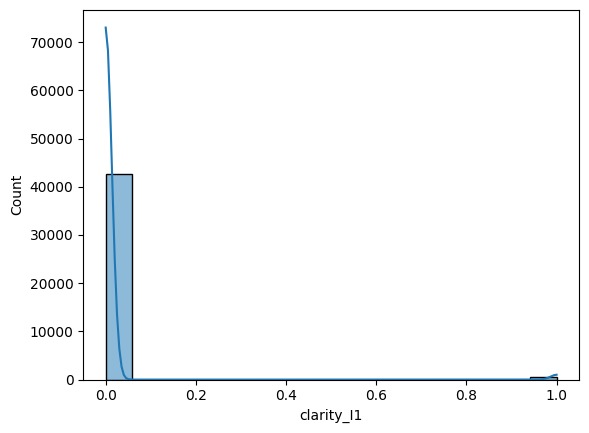

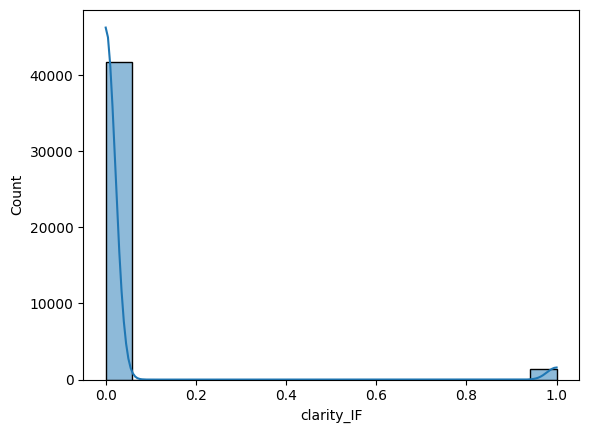

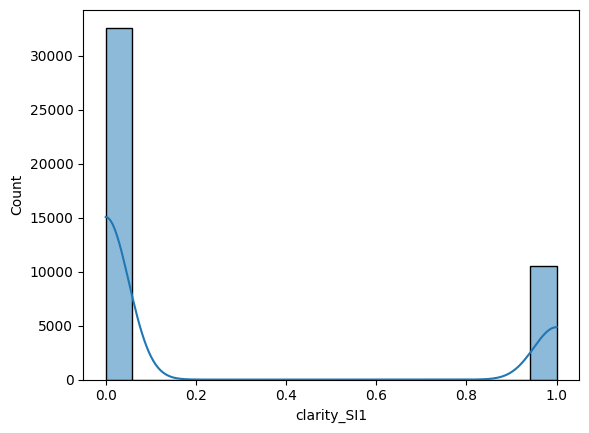

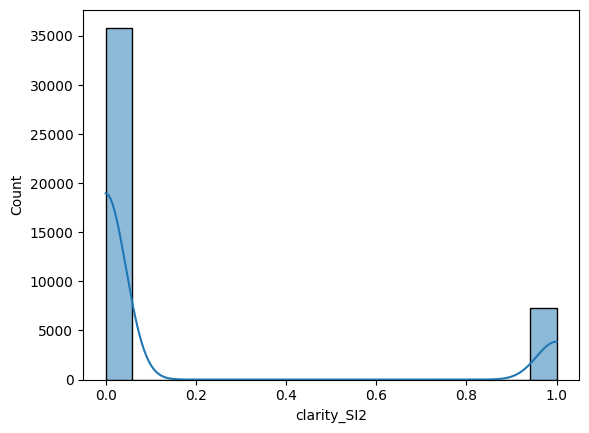

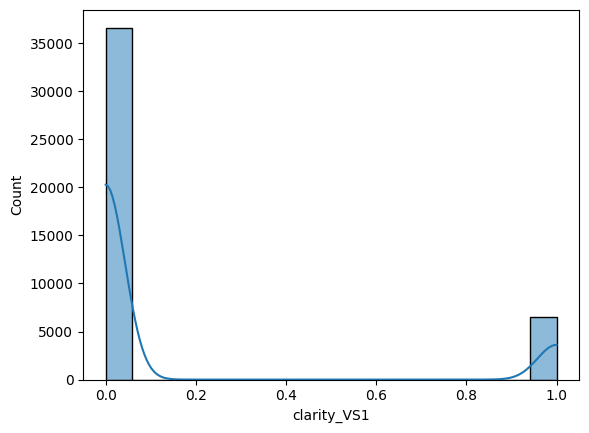

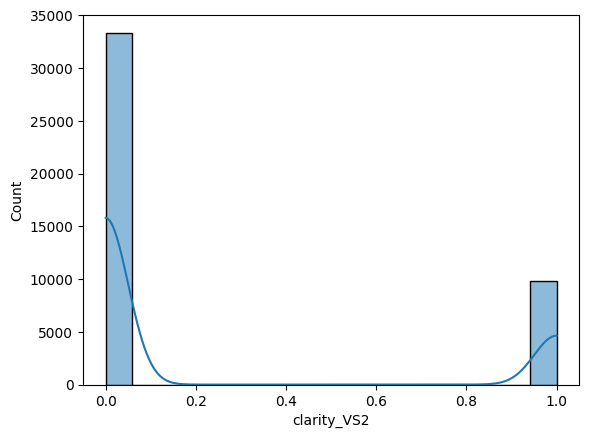

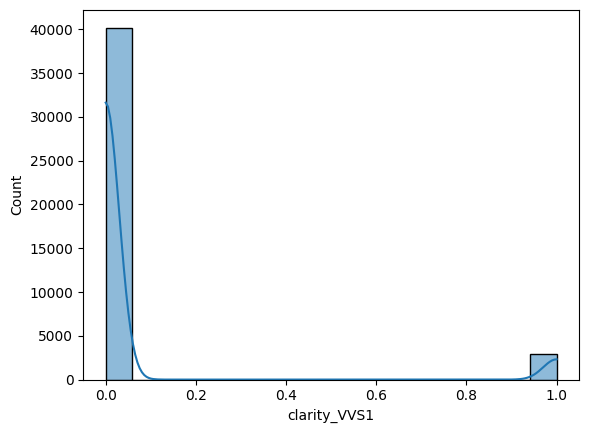

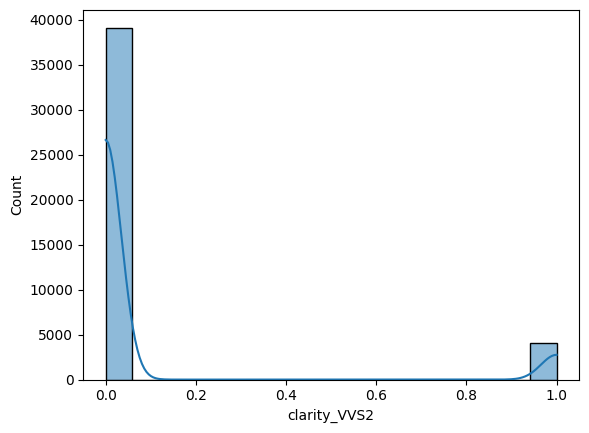

In [1387]:
numerical_cols=x_train.select_dtypes(include=np.number).columns
for col in numerical_cols:
  sns.histplot(x_train[col],kde=True),plt.show()

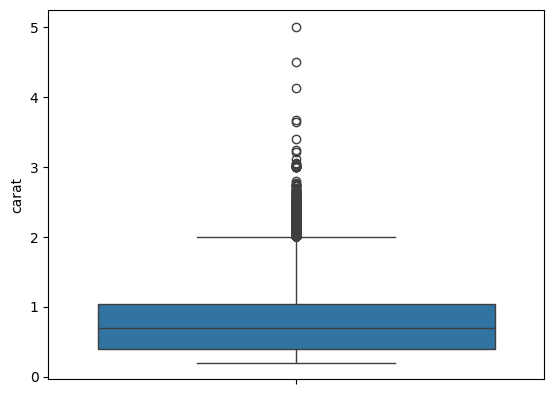

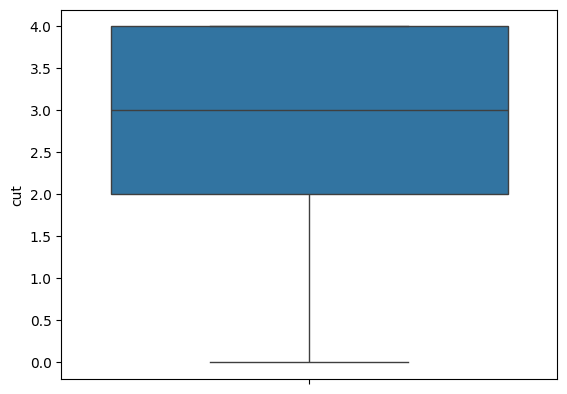

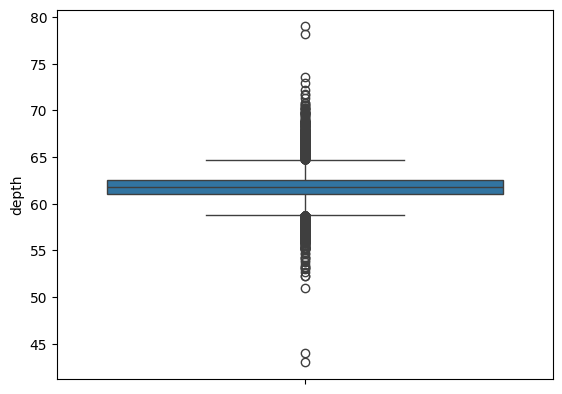

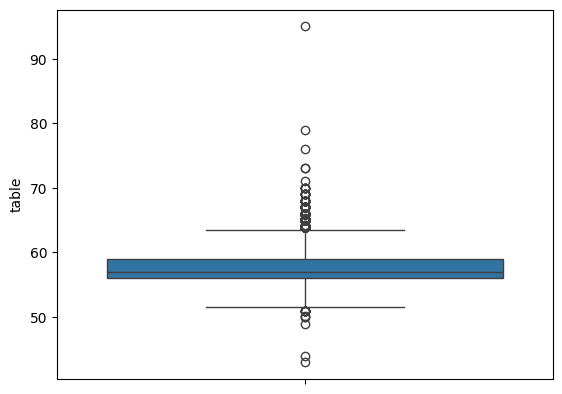

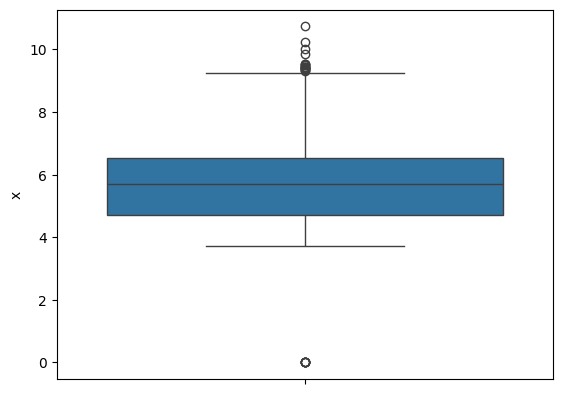

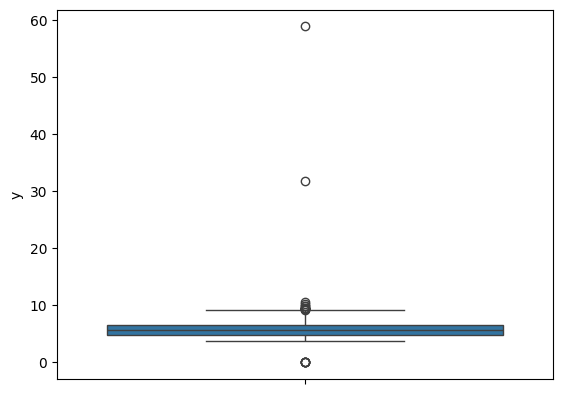

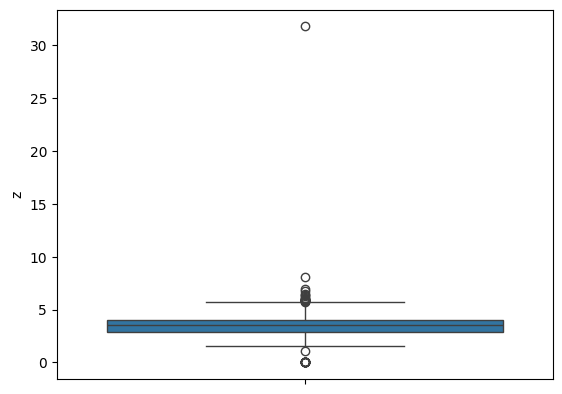

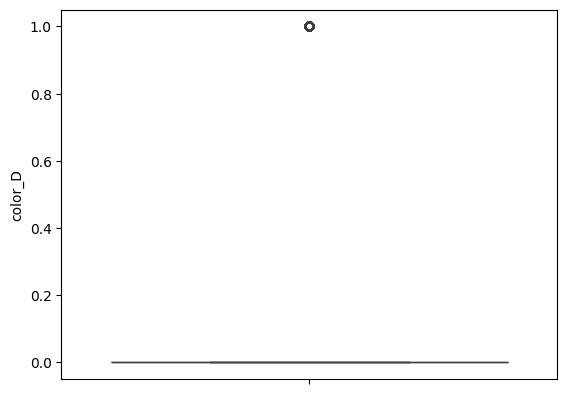

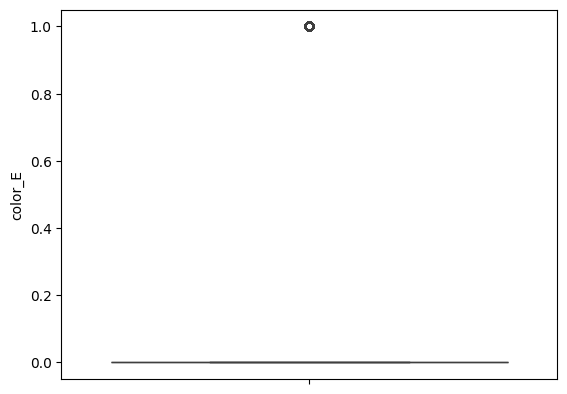

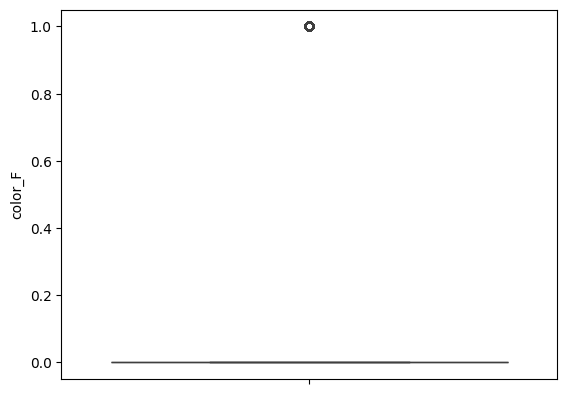

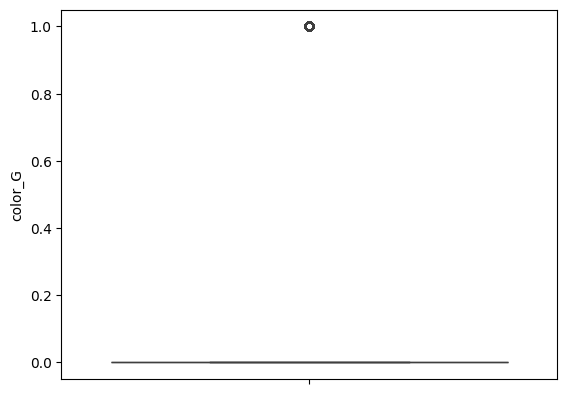

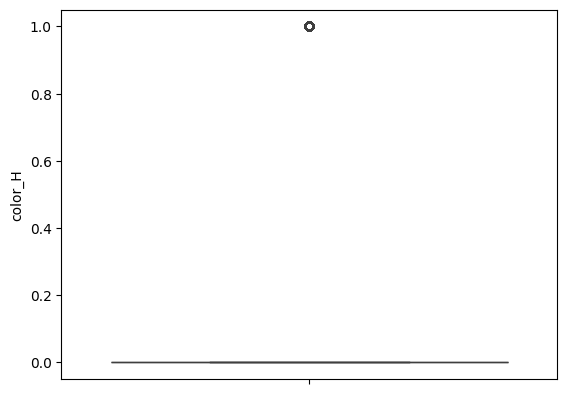

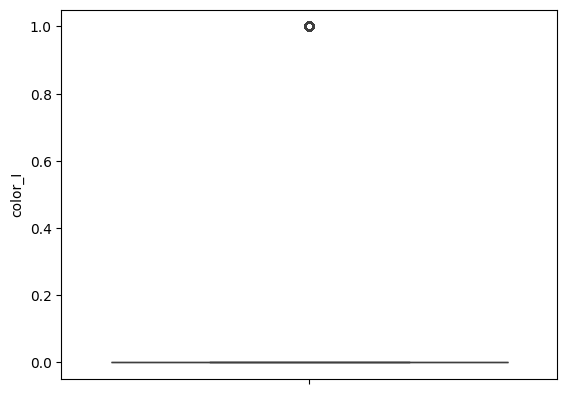

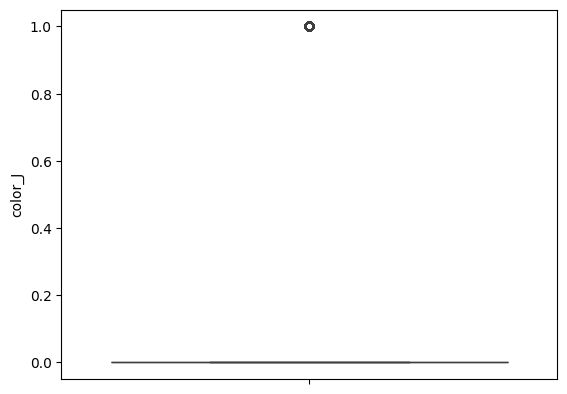

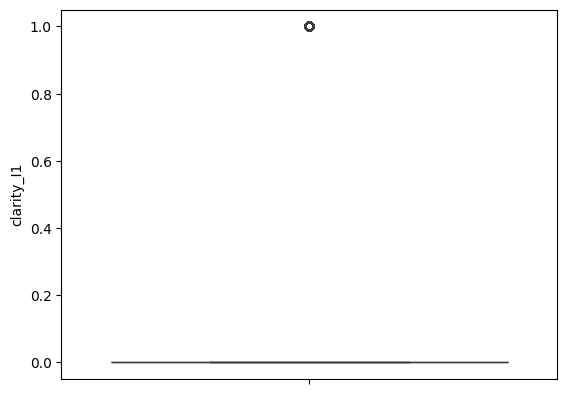

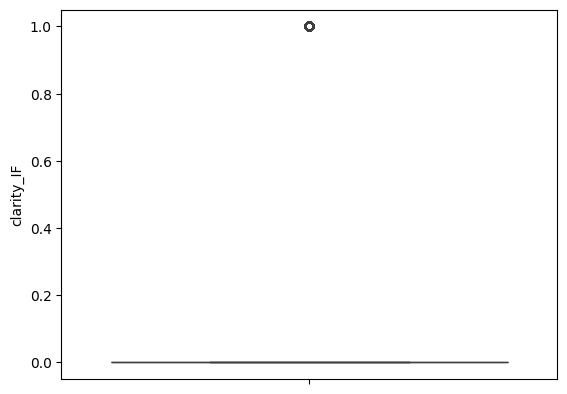

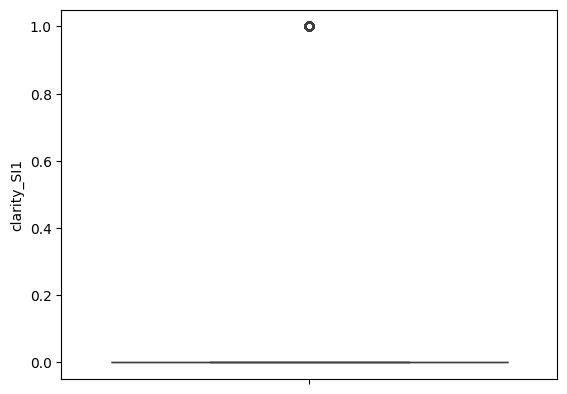

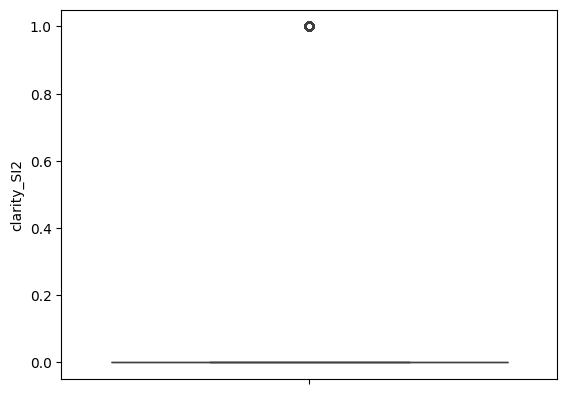

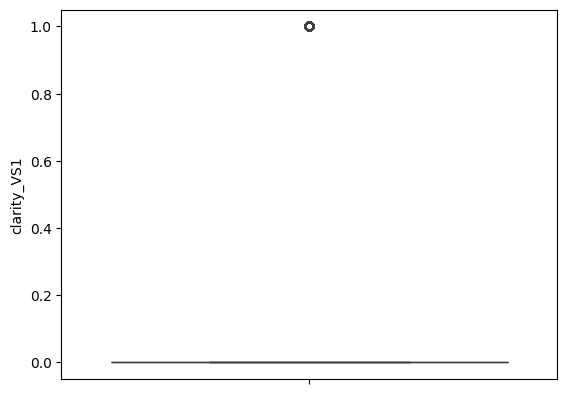

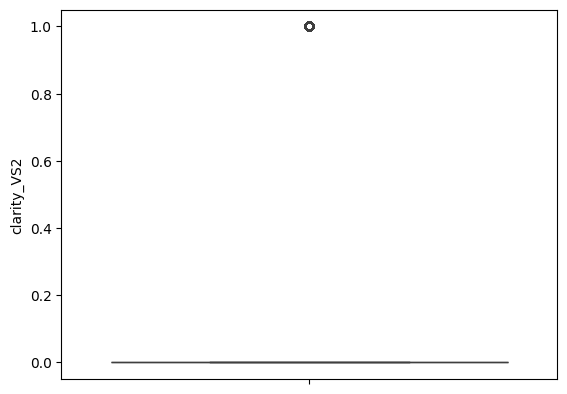

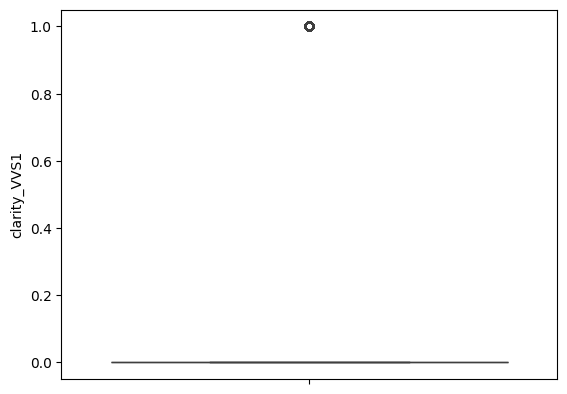

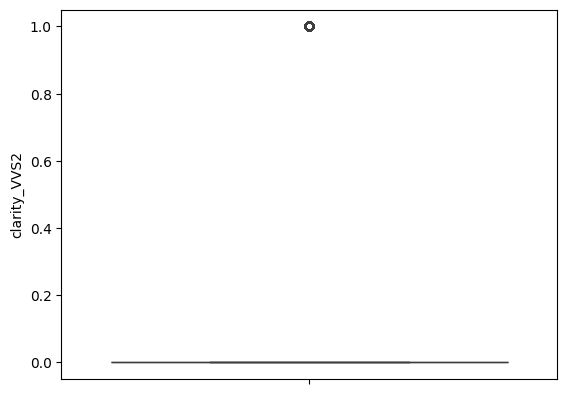

In [1388]:
for col in numerical_cols:
  sns.boxplot(x_train[col]),plt.show()

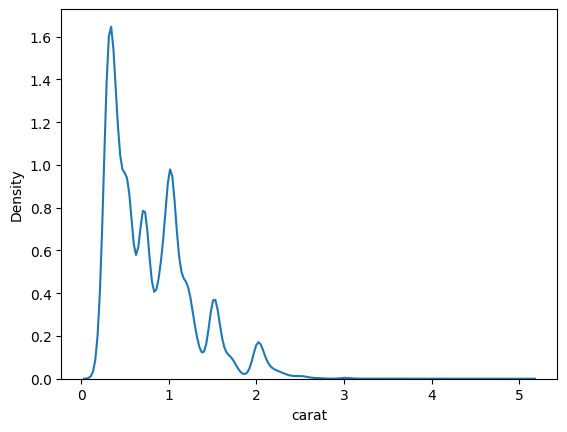

In [1389]:
sns.kdeplot(x_train['carat'])
plt.show()

In [1390]:
from scipy.stats.mstats import winsorize
x_train['z']=winsorize(x_train['z'],limits=(0.05,0.05))
x_train['y']=winsorize(x_train['y'],limits=(0.05,0.05))
x_train['x']=winsorize(x_train['x'],limits=(0.05,0.05))
x_train['table']=winsorize(x_train['table'],limits=(0.05,0.05))
x_train['depth']=winsorize(x_train['depth'],limits=(0.05,0.05))
x_train.head()

,carat,cut,depth,table,x,y,z,color_D,color_E,color_F,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
26546,2.01,1.0,59.3,61.0,7.65,7.64,4.73,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9159,1.01,2.0,60.0,60.0,6.57,6.49,3.92,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14131,1.10,3.0,62.5,58.0,6.59,6.54,4.10,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15757,1.50,1.0,61.5,61.0,7.21,7.17,4.42,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
24632,1.52,2.0,62.1,57.0,7.27,7.32,4.53,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [1391]:
Q1_carat=x_train['carat'].quantile(0.25)
Q3_carat=x_train['carat'].quantile(0.75)
IQR_carat=Q3_carat-Q1_carat

upper_bound_carat=Q3_carat+1.5*IQR_carat
lower_bound_carat=Q1_carat-1.5*IQR_carat

x_train['carat']=np.where(x_train['carat']>upper_bound_carat,upper_bound_carat,x_train['carat'])
x_train['carat']=np.where(x_train['carat']<lower_bound_carat,lower_bound_carat,x_train['carat'])


In [1392]:
x_train

,carat,cut,depth,table,x,y,z,color_D,color_E,color_F,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
26546,2.00,1.0,59.3,61.0,7.65,7.64,4.73,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9159,1.01,2.0,60.0,60.0,6.57,6.49,3.92,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14131,1.10,3.0,62.5,58.0,6.59,6.54,4.10,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15757,1.50,1.0,61.5,61.0,7.21,7.17,4.42,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
24632,1.52,2.0,62.1,57.0,7.27,7.32,4.53,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1.05,2.0,62.4,59.0,6.48,6.51,4.05,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
44732,0.47,4.0,61.0,55.0,5.03,5.01,3.06,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
38158,0.33,2.0,60.3,58.0,4.49,4.46,2.70,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.90,3.0,62.8,59.0,6.13,6.03,3.82,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [1393]:
# from sklearn.preprocessing import StandardScaler,RobustScaler
# sc=RobustScaler()
# x_train=sc.fit_transform(x_train)
# x_test=sc.transform(x_test)


In [1394]:
from sklearn.linear_model import LinearRegression

In [1395]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [1396]:
y_pred=lr.predict(x_test)

In [1397]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,root_mean_squared_error

In [1398]:
mean_absolute_error(y_pred,y_test)

726.159830535355

In [1399]:
mean_squared_error(y_test,y_pred)

1351574.13177092

In [1400]:
r2_score(y_test,y_pred)

0.914978341052964

In [1401]:
root_mean_squared_error(y_test,y_pred)

1162.5722049709084

In [1402]:
# log transforms - highly skwed
# robust scale - highly skewed and otliers detect

In [1403]:
df2=sns.load_dataset('penguins')
df2.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [1404]:
df2.isnull().sum()
df2[df2.isnull().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [1405]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


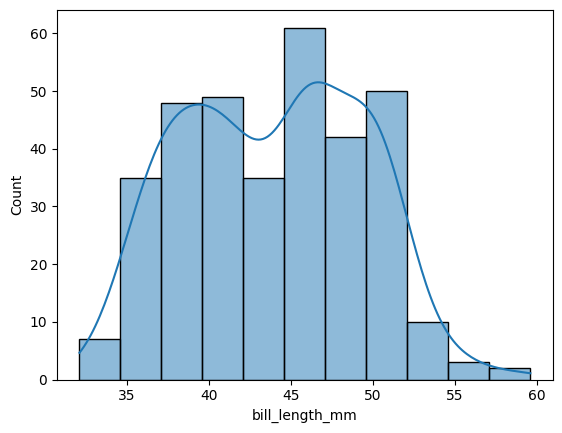

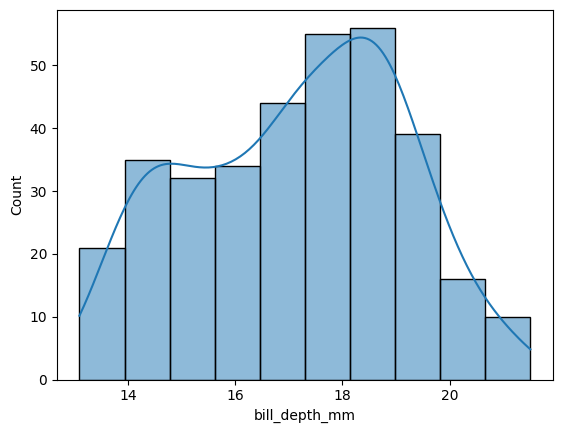

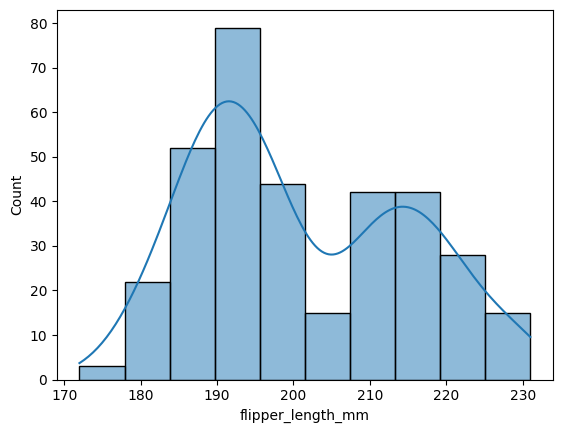

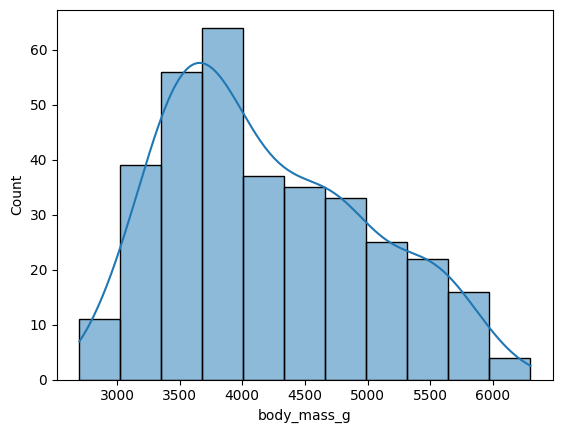

In [1406]:
numerical_col=df2.select_dtypes(include=np.number).columns
for col in numerical_col:
  sns.histplot(df2[col],kde=True),plt.show()

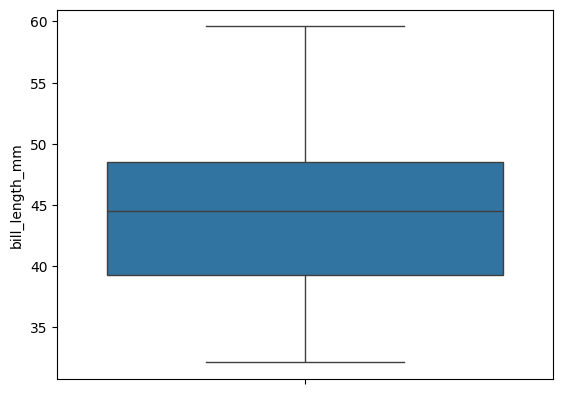

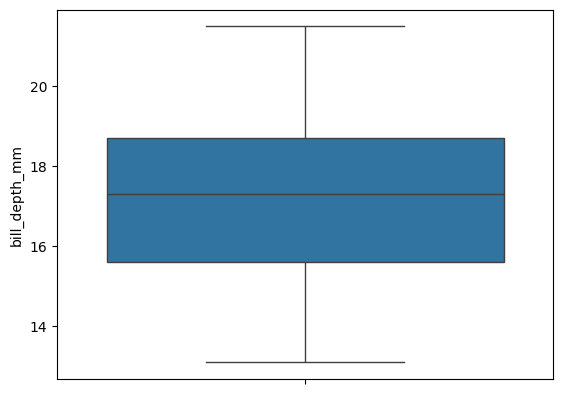

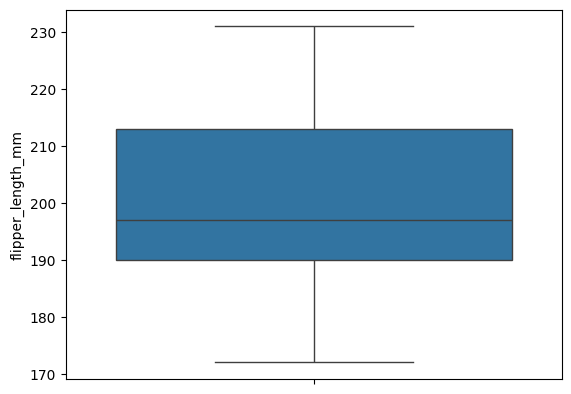

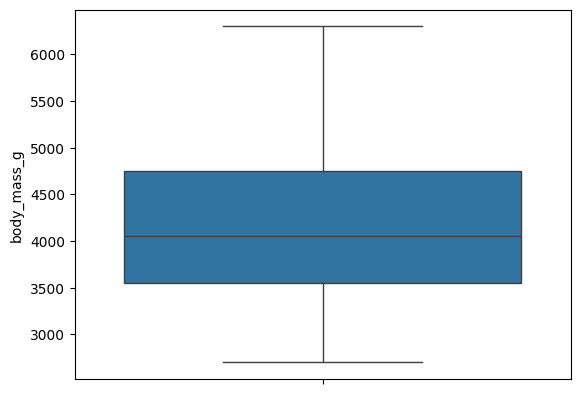

In [1407]:
for col in numerical_col:
  sns.boxplot(df2[col]),plt.show()

In [1408]:
mode=df2['sex'].mode()
df2['sex'].fillna('Male',inplace=True)
df2

/tmp/ipython-input-1062/892835661.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['sex'].fillna('Male',inplace=True)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,Male
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,Male
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [1409]:
mode

,sex
0,Male


In [1410]:
Avg1=df2['bill_length_mm'].mean()
Avg2=df2['bill_depth_mm'].mean()
Avg3=df2['flipper_length_mm'].mean()
Avg4=df2['body_mass_g'].mean()
df2['bill_length_mm'].fillna(Avg1,inplace=True)
df2['bill_depth_mm'].fillna(Avg2,inplace=True)
df2['flipper_length_mm'].fillna(Avg3,inplace=True)
df2['body_mass_g'].fillna(Avg4,inplace=True)
df2.isnull().sum()

/tmp/ipython-input-1062/210414530.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['bill_length_mm'].fillna(Avg1,inplace=True)
/tmp/ipython-input-1062/210414530.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

,0
species,0
island,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


In [1411]:
df2.dtypes

,0
species,object
island,object
bill_length_mm,float64
bill_depth_mm,float64
flipper_length_mm,float64
body_mass_g,float64
sex,object


In [1412]:
df2['species'].nunique()

3

In [1413]:
df2['island'].nunique()

3

In [1414]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [1415]:
df2['sex']=LabelEncoder().fit_transform(df2['sex'])


In [1416]:
df2.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,1
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,0
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,0
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,1
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,0


In [1417]:
df2=pd.get_dummies(df2,columns=['island'],prefix=['ISLAND'],drop_first=True)


In [1418]:
df2.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,ISLAND_Dream,ISLAND_Torgersen
0,Adelie,39.10000,18.70000,181.000000,3750.000000,1,False,True
1,Adelie,39.50000,17.40000,186.000000,3800.000000,0,False,True
2,Adelie,40.30000,18.00000,195.000000,3250.000000,0,False,True
3,Adelie,43.92193,17.15117,200.915205,4201.754386,1,False,True
4,Adelie,36.70000,19.30000,193.000000,3450.000000,0,False,True


In [1419]:
bool_col=df2.select_dtypes(include='bool').columns
df2[bool_col]=df2[bool_col].astype(int)


In [1420]:
df2.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,ISLAND_Dream,ISLAND_Torgersen
0,Adelie,39.10000,18.70000,181.000000,3750.000000,1,0,1
1,Adelie,39.50000,17.40000,186.000000,3800.000000,0,0,1
2,Adelie,40.30000,18.00000,195.000000,3250.000000,0,0,1
3,Adelie,43.92193,17.15117,200.915205,4201.754386,1,0,1
4,Adelie,36.70000,19.30000,193.000000,3450.000000,0,0,1


In [1421]:
df2.nunique()

,0
species,3
bill_length_mm,165
bill_depth_mm,81
flipper_length_mm,56
body_mass_g,95
sex,2
ISLAND_Dream,2
ISLAND_Torgersen,2


In [1422]:
from sklearn.model_selection import train_test_split

In [1423]:
x=df2.drop(['species'],axis=1)
y=df2['species']

In [1424]:
x

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,ISLAND_Dream,ISLAND_Torgersen
0,39.10000,18.70000,181.000000,3750.000000,1,0,1
1,39.50000,17.40000,186.000000,3800.000000,0,0,1
2,40.30000,18.00000,195.000000,3250.000000,0,0,1
3,43.92193,17.15117,200.915205,4201.754386,1,0,1
4,36.70000,19.30000,193.000000,3450.000000,0,0,1
...,...,...,...,...,...,...,...
339,43.92193,17.15117,200.915205,4201.754386,1,0,0
340,46.80000,14.30000,215.000000,4850.000000,0,0,0
341,50.40000,15.70000,222.000000,5750.000000,1,0,0
342,45.20000,14.80000,212.000000,5200.000000,0,0,0


In [1425]:
y

,species
0,Adelie
1,Adelie
2,Adelie
3,Adelie
4,Adelie
...,...
339,Gentoo
340,Gentoo
341,Gentoo
342,Gentoo


In [1426]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((275, 7), (69, 7), (275,), (69,))

In [1427]:
x_train,x_test,y_train,y_test

(     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  sex  \
 66             35.5           16.2              195.0       3350.0    0   
 229            46.8           15.4              215.0       5150.0    1   
 7              39.2           19.6              195.0       4675.0    1   
 140            40.2           17.1              193.0       3400.0    0   
 323            49.1           15.0              228.0       5500.0    1   
 ..              ...            ...                ...          ...  ...   
 188            47.6           18.3              195.0       3850.0    0   
 71             39.7           18.4              190.0       3900.0    1   
 106            38.6           17.2              199.0       3750.0    0   
 270            46.6           14.2              210.0       4850.0    0   
 102            37.7           16.0              183.0       3075.0    0   
 
      ISLAND_Dream  ISLAND_Torgersen  
 66              0                 0  
 229    

In [1428]:
from sklearn.linear_model import LogisticRegression

In [1429]:
#  from sklearn.preprocessing import StandardScaler
#  std=StandardScaler()
#  x_train=std.fit_transform(x_train)
#  x_test=std.transform(x_test)

In [1430]:
 from sklearn.preprocessing import StandardScaler
 std=StandardScaler()
 df2['body_mass_g ']=std.fit_transform(df2[['body_mass_g']])

In [1431]:
lr=LogisticRegression()
lr.fit(x_train,y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [1432]:
df2.columns

Index(['species', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex', 'ISLAND_Dream', 'ISLAND_Torgersen',
       'body_mass_g '],
      dtype='object')

In [1433]:
y_predict=lr.predict(x_test)
y_predict

array(['Chinstrap', 'Gentoo', 'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie',
       'Chinstrap', 'Chinstrap', 'Adelie', 'Chinstrap', 'Adelie',
       'Chinstrap', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Chinstrap', 'Adelie', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Gentoo', 'Chinstrap', 'Adelie', 'Gentoo', 'Adelie',
       'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie'], dtype=object)

In [1434]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [1435]:
accuracy_score(y_test,y_predict)

0.9855072463768116

In [1436]:
confusion_matrix(y_test,y_predict)

array([[32,  0,  0],
       [ 0, 15,  1],
       [ 0,  0, 21]])

In [1437]:
classification_report(y_test,y_predict)

'              precision    recall  f1-score   support\n\n      Adelie       1.00      1.00      1.00        32\n   Chinstrap       1.00      0.94      0.97        16\n      Gentoo       0.95      1.00      0.98        21\n\n    accuracy                           0.99        69\n   macro avg       0.98      0.98      0.98        69\nweighted avg       0.99      0.99      0.99        69\n'

In [1438]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [1439]:
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
dtc.fit(x_train,y_train)
rfc.fit(x_train,y_train)


RandomForestClassifier()

In [1440]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [1441]:
y_predict=dtc.predict(x_test)
y_predict

array(['Chinstrap', 'Chinstrap', 'Gentoo', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Chinstrap', 'Chinstrap', 'Adelie', 'Chinstrap',
       'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Adelie', 'Chinstrap',
       'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Gentoo',
       'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Gentoo', 'Chinstrap', 'Adelie', 'Gentoo', 'Adelie',
       'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie'], dtype=object)

In [1442]:
accuracy_score(y_test,y_predict)

0.9855072463768116

In [1443]:
confusion_matrix(y_test,y_predict)

array([[31,  0,  1],
       [ 0, 16,  0],
       [ 0,  0, 21]])

In [1444]:
y_predict=rfc.predict(x_test)
y_predict

array(['Chinstrap', 'Chinstrap', 'Gentoo', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Chinstrap', 'Chinstrap', 'Adelie', 'Chinstrap',
       'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Adelie', 'Chinstrap',
       'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Gentoo',
       'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Gentoo', 'Chinstrap', 'Adelie', 'Gentoo', 'Adelie',
       'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie'], dtype=object)

In [1445]:
accuracy_score(y_test,y_predict)

0.9855072463768116

In [1446]:
confusion_matrix(y_test,y_predict)

array([[31,  0,  1],
       [ 0, 16,  0],
       [ 0,  0, 21]])

In [1447]:
from sklearn.neighbors import KNeighborsClassifier



In [1448]:
metric_k={}
neighbors=np.arange(3,20)
for k in neighbors:
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)
  y_predict=knn.predict(x_test)
  accuracy=accuracy_score(y_test,y_predict)
  metric_k[k]=accuracy

In [1449]:
metric_k

{np.int64(3): 0.7101449275362319,
 np.int64(4): 0.6811594202898551,
 np.int64(5): 0.6811594202898551,
 np.int64(6): 0.7101449275362319,
 np.int64(7): 0.7101449275362319,
 np.int64(8): 0.7101449275362319,
 np.int64(9): 0.7101449275362319,
 np.int64(10): 0.6956521739130435,
 np.int64(11): 0.7246376811594203,
 np.int64(12): 0.6956521739130435,
 np.int64(13): 0.6956521739130435,
 np.int64(14): 0.6956521739130435,
 np.int64(15): 0.7101449275362319,
 np.int64(16): 0.6956521739130435,
 np.int64(17): 0.6956521739130435,
 np.int64(18): 0.7101449275362319,
 np.int64(19): 0.7101449275362319}

Text(0, 0.5, 'accuracy')

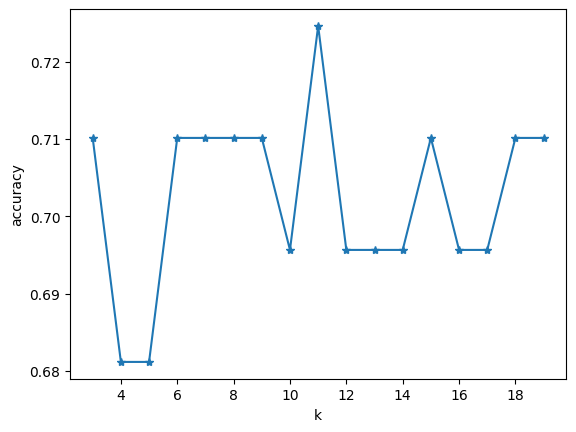

In [1450]:
plt.plot(metric_k.keys(),metric_k.values(),marker='*')
plt.xlabel('k')
plt.ylabel('accuracy')

In [1451]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
y_predict=knn.predict(x_test)
accuracy=accuracy_score(y_test,y_predict)
accuracy

0.6956521739130435

In [1452]:
confusion_matrix(y_test,y_predict)

array([[28,  0,  4],
       [14,  2,  0],
       [ 3,  0, 18]])